## Feature Engineering Unstructured (Privacy data aware!!!) with LLM


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/llm_could.png" width=800>


In [1]:
# !pip install python-dotenv
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.environ.get('OPENAI_API_KEY')

In [2]:
import pandas as pd
from openai import OpenAI
import concurrent.futures

def ask_chatgpt(model_name: str, client: OpenAI) -> str:
    """
    Call ad API ChatGPT.
    """
    try:
        completion = client.chat.completions.create(
                                                    model="gpt-4o-mini",
                                                    messages=[
                                                            {"role": "system", "content": """Sei un esperto di automobili. Classifica in: 
                                                                                              SUV, Compact, Sedan, Hatchback, MPV, Off-road, Luxury, Sports, NotClassified
                                                                                            """},
                                                            {"role": "user", "content": f"Classifica: {model_name}. Rispondi solo con la categoria."}
                                                            ])
        return completion.choices[0].message.content.strip()
    except:
        return "NotClassified"

def classify_batch(models, api_key: str):
    """
    Classifica un batch di modelli in parallelo.
    """
    client = OpenAI(api_key=api_key)
    results = []
    
    for model in models:
        try:
            car_type = ask_chatgpt(model, client)
            results.append({"model": model, "type": car_type})
        except:
            results.append({"model": model, "type": "NotClassified"})
    
    return results

def process_car_dataset(df: pd.DataFrame, api_key: str, batch_size: int = 10) -> pd.DataFrame:
    """
    Processes the dataset using sequential batches
    
    Args:
        df: DataFrame with 'name' column containing car names
        api_key: OpenAI API key
        batch_size: Batch size for processing
    """
    models = df['name'].tolist()
    total_models = len(models)
    results = []
    
    batches = [models[i:i + batch_size] for i in range(0, total_models, batch_size)]
    print(f"Classifying {total_models} observations")
    
    completed = 0
    for batch in batches:
        batch_results = classify_batch(batch, api_key)
        results.extend(batch_results)
        completed += len(batch_results)
        print(f"Progress: {completed}/{total_models} observations classified")
    
    classifications = {item["model"]: item["type"] for item in results}    
    df['vehicle_type'] = df['name'].map(classifications)
    
    return df

takes... 8 min

In [3]:
df = pd.read_csv('cars_cleaned.csv')

batch = 50
df_ = process_car_dataset(df, api_key, batch_size=50)
print("\nClassificazione completata:")
df_

Classifying 817 observations
Progress: 50/817 observations classified
Progress: 100/817 observations classified
Progress: 150/817 observations classified
Progress: 200/817 observations classified
Progress: 250/817 observations classified
Progress: 300/817 observations classified
Progress: 350/817 observations classified
Progress: 400/817 observations classified
Progress: 450/817 observations classified
Progress: 500/817 observations classified
Progress: 550/817 observations classified
Progress: 600/817 observations classified
Progress: 650/817 observations classified
Progress: 700/817 observations classified
Progress: 750/817 observations classified
Progress: 800/817 observations classified
Progress: 817/817 observations classified

Classificazione completata:


,name,year,Price,kms_driven,fuel_type,vehicle_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,45000,Petrol,NotClassified
1,Mahindra Jeep CL550 MDI,2006,4250.0,40,Diesel,Off-road
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,28000,Petrol,Hatchback
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,36000,Diesel,SUV
4,Ford Figo,2012,1750.0,41000,Diesel,Hatchback
...,...,...,...,...,...,...
812,Toyota Corolla Altis,2009,3000.0,132000,Petrol,Sedan
813,Tata Zest XM Diesel,2018,2600.0,27000,Diesel,Sedan
814,Mahindra Quanto C8,2013,3900.0,40000,Diesel,MPV
815,Honda Amaze 1.2 E i VTEC,2014,1800.0,50000,Petrol,Sedan


In [5]:
#salvo i risultati delle call su un csv
df_.to_csv('cars_classes.csv',index=False)

## Start From Here after ChatGPT Call

In [1]:
import pandas as pd

path = 'cars_classes.csv'
df_ = pd.read_csv(path)
df = df_.copy()

In [2]:
#rimuovo outliers sopra i 20000
df= df[df['Price']< 20000]

In [3]:
df['vehicle_type'].value_counts()

vehicle_type
Hatchback        266
Sedan            198
SUV              110
Compact           92
MPV               78
Off-road          37
NotClassified     26
Luxury             2
Name: count, dtype: int64

In [5]:
df[df['vehicle_type']=='NotClassified']

,name,year,Price,kms_driven,fuel_type,vehicle_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.00,45000,Petrol,NotClassified
12,Hyundai Santro Xing XO eRLX Euro III,2007,800.00,45000,Petrol,NotClassified
81,Honda Brio,2012,2249.99,30000,Petrol,NotClassified
171,Honda Brio,2012,2249.99,30000,Petrol,NotClassified
184,Hyundai Santro Xing XS,2005,490.00,7500,Petrol,NotClassified
186,Maruti Suzuki Zen VX,2000,550.00,60000,Petrol,NotClassified
194,Tata Nano Cx BSIV,2013,400.00,2200,Petrol,NotClassified
202,Renault Scala RxL Diesel Travelogue,2015,3750.00,25000,Diesel,NotClassified
268,Maruti Suzuki Maruti 800 Std,2003,570.00,56758,Petrol,NotClassified
276,Hyundai Santro Xing XO eRLX Euro III,2000,590.00,56450,Petrol,NotClassified


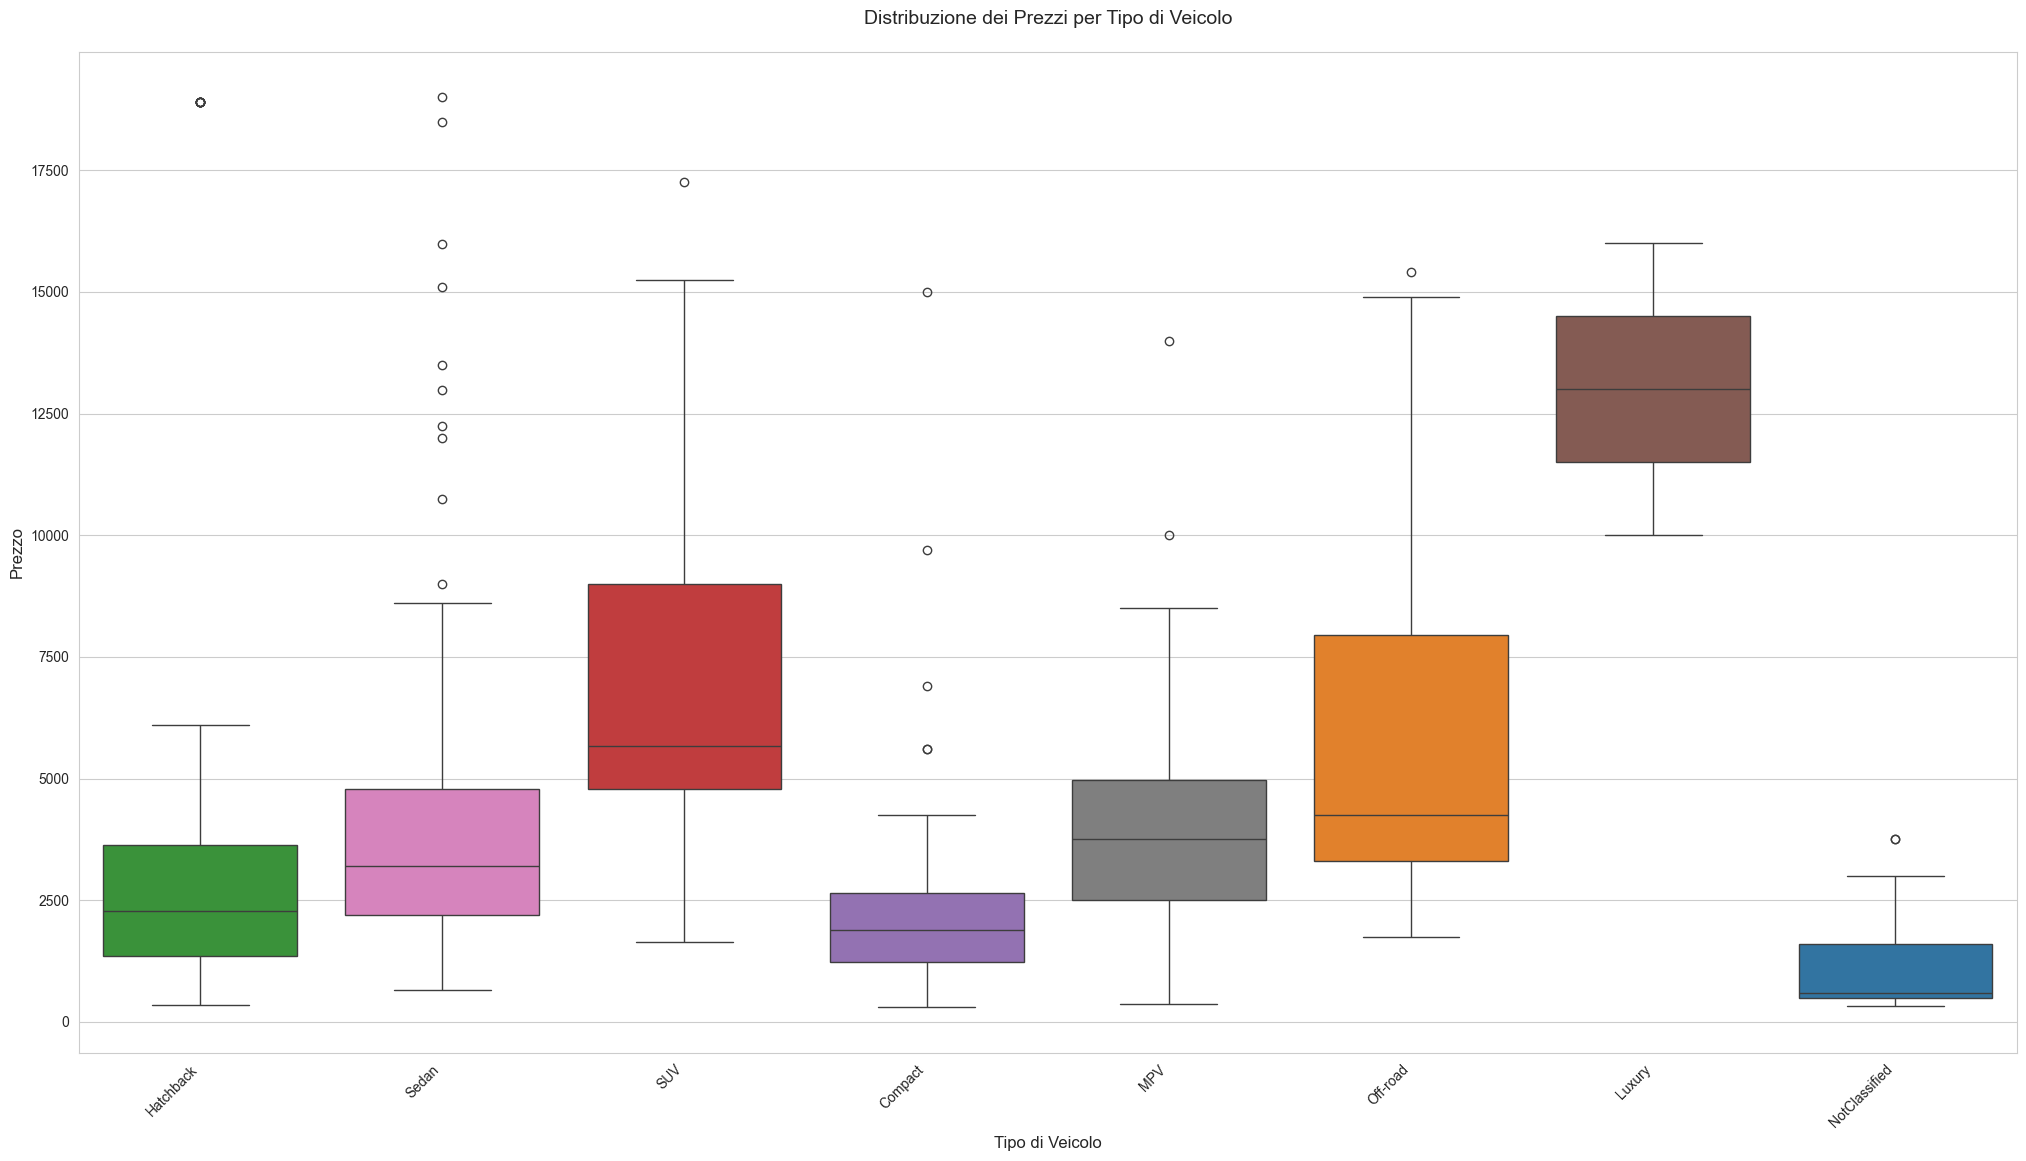

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(25,13))

box_plot = sns.boxplot(
                        data=df,
                        x='vehicle_type',
                        y='Price',
                        hue='vehicle_type',
                        order=['Hatchback', 'Sedan', 'SUV', 'Compact', 'MPV', 'Off-road', 'Luxury', 'NotClassified']
                        )

plt.title('Distribuzione dei Prezzi per Tipo di Veicolo', pad=20, size=14)
plt.xlabel('Tipo di Veicolo', size=12)
plt.ylabel('Prezzo', size=12)
plt.xticks(rotation=45, ha='right');

In [ ]:
# df["model_names"] = df['name'].str.split().str[1]
# df["brand_names"] = df['name'].str.split().str[0]
# df["brand_model_names"] = df.apply(lambda x: f"{x['brand_names']} {x['model_names']}", axis=1)

In [10]:
df['brand'] = df['name'].str.split().str[0]
df = pd.get_dummies(df,columns=['fuel_type', 'brand','vehicle_type'], drop_first=True,dtype=int)
df['old'] = 2024 - df['year']

### Modeling

In [11]:
drop_columns = ['Price','name','year'] # not useless
TARGET = 'Price'

X = df.drop(columns=drop_columns)
y = df[TARGET]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=667,
                                                    )

In [13]:
from sklearn.metrics import r2_score,mean_squared_error

def overfit_eval(model, X, y):
    """
    model: il nostro modello predittivo già addestrato
    X: una tupla contenente le prorietà del train set e test set (X_train, X_test)
    y: una tupla contenente target del train set e test set (y_train, y_test)
    """
    y_pred_train = model.predict(X[0])
    y_pred_test = model.predict(X[1])
    mse_train = mean_squared_error(y[0], y_pred_train)
    mse_test = mean_squared_error(y[1], y_pred_test)
    r2_train = r2_score(y[0], y_pred_train)
    r2_test = r2_score(y[1], y_pred_test)

    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))

In [14]:
from sklearn.linear_model import ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10]

for alpha in alphas:
    print("Lambda is: "+str(alpha))
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic.fit(X_train, y_train)
    overfit_eval(elastic, (X_train, X_test),(y_train, y_test))

Lambda is: 0.0001
Train set:  MSE=2039871.4734021092 R2=0.8226615508596887
Test set:  MSE=4136831.9725144403 R2=0.5226936077507445
Lambda is: 0.001
Train set:  MSE=2177401.5956521155 R2=0.8107052198320202
Test set:  MSE=3725239.5525286403 R2=0.5701830137420527
Lambda is: 0.01
Train set:  MSE=3125753.1718991925 R2=0.7282592422474933
Test set:  MSE=3538556.6761502684 R2=0.591722426222641
Lambda is: 0.1
Train set:  MSE=6357429.491948391 R2=0.44730994019898085
Test set:  MSE=5280754.403910666 R2=0.39070819176807414
Lambda is: 1
Train set:  MSE=8674386.400979703 R2=0.2458827668059117
Test set:  MSE=6942708.767789409 R2=0.1989524117952871
Lambda is: 10
Train set:  MSE=9643676.410144867 R2=0.16161648374158444
Test set:  MSE=7607514.457728409 R2=0.12224733711015523


In [15]:
# model = ElasticNet(alpha=0.001, l1_ratio=0.5)
# model.fit(X_train, y_train)

In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
# from xgboost import XGBRegressor

# model = XGBRegressor()
# model.fit(X_train, y_train)

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score, root_mean_squared_error

r2 = r2_score(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f'R2: {r2}')
print(f'RMSE: {rmse:.2f}')

R2: 0.6870202602928016
RMSE: 1647.00


In [20]:
model.feature_importances_

array([1.15831929e-01, 2.93810439e-04, 1.50718033e-02, 3.97750442e-02,
       3.11181482e-03, 8.24054995e-04, 7.37282710e-05, 8.07751445e-04,
       2.03923573e-03, 4.42177563e-06, 3.23754432e-03, 1.24451716e-02,
       7.97398441e-04, 1.04971172e-02, 6.44361399e-03, 4.64434743e-02,
       2.07862663e-01, 7.86408634e-02, 2.88383058e-04, 3.60360477e-03,
       8.23995337e-04, 1.39567782e-02, 2.90106273e-02, 4.93024801e-03,
       2.97364355e-02, 8.52459758e-03, 1.21903310e-02, 1.16355064e-02,
       4.27223039e-04, 1.19194937e-02, 1.10432302e-01, 2.06354603e-02,
       1.97683575e-01])

(<matplotlib.legend.Legend at 0x1ef69d06850>,)

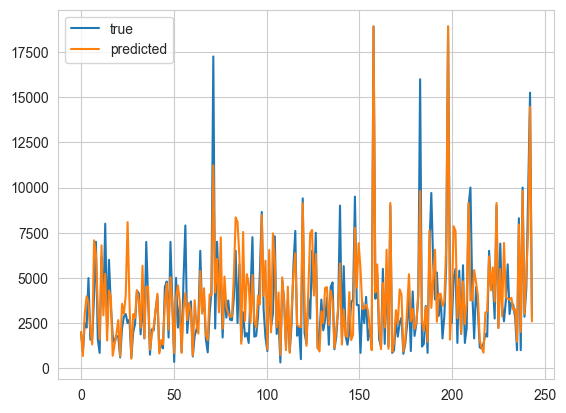

In [21]:
import matplotlib.pyplot as plt
import numpy as np

lenght = len(y_test)
x = np.linspace(0,lenght,lenght)
plt.plot(x,y_test,label='true')
plt.plot(x,y_pred,label='predicted')
plt.legend(),

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_prediction_errors(y_test, y_pred, X_test, n_worst=10):
    """
    Analizza gli errori di predizione e mostra i casi peggiori.
    """
    # Calcola gli errori
    errors = y_test - y_pred
    abs_errors = np.abs(errors)
    
    # Crea un DataFrame con tutti i dati rilevanti
    error_df = pd.DataFrame({
                            'Actual': y_test,
                            'Predicted': y_pred,
                            'Error': errors,
                            'Abs_Error': abs_errors
                        })
    
    # Aggiungi le feature del test set
    error_df = pd.concat([error_df, X_test.reset_index(drop=True)], axis=1)
    
    # Trova i casi peggiori
    worst_cases = error_df.nlargest(n_worst, 'Abs_Error')
    
    print("=== Statistiche degli Errori ===")
    print(f"Errore medio: {errors.mean():.2f}")
    print(f"Errore mediano: {np.median(errors):.2f}")
    print(f"Deviazione standard errori: {errors.std():.2f}")
    print(f"Errore assoluto medio: {abs_errors.mean():.2f}")
    print("\n=== Casi Peggiori ===")
    print(worst_cases[['Actual', 'Predicted', 'Error', 'Abs_Error']].round(2))
    
    # Inizializzo il subplot fissando gli assi, matrice 1x2
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Distribuzione degli errori
    sns.histplot(data=errors, bins=30, ax=ax1)
    ax1.set_title('Distribuzione degli Errori')
    ax1.set_xlabel('Errore')
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    
    # Actual vs Predicted
    sns.scatterplot(data=error_df, x='Actual', y='Predicted', ax=ax2, alpha=0.5)
    ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
             'r--', label='Perfect Predictions')
    ax2.set_title('Valori Reali vs Predetti')
    ax2.set_xlabel('Valori Reali')
    ax2.set_ylabel('Valori Predetti')
    ax2.legend()
    #plt.show()
    
    return error_df, worst_cases

=== Statistiche degli Errori ===
Errore medio: -247.94
Errore mediano: -197.60
Deviazione standard errori: 1631.59
Errore assoluto medio: 1073.19

=== Casi Peggiori ===
      Actual  Predicted    Error  Abs_Error
677   9700.0    3341.40  6358.60    6358.60
14   10000.0    3760.90  6239.10    6239.10
511  15990.0    9803.20  6186.80    6186.80
653  17250.0   11227.40  6022.60    6022.60
50    2500.0    8086.55 -5586.55    5586.55
29    2500.0    8086.55 -5586.55    5586.55
157   2750.0    7460.40 -4710.40    4710.40
501    850.0    5501.50 -4651.50    4651.50
783   3000.0    7462.20 -4462.20    4462.20
19    3100.0    7542.90 -4442.90    4442.90


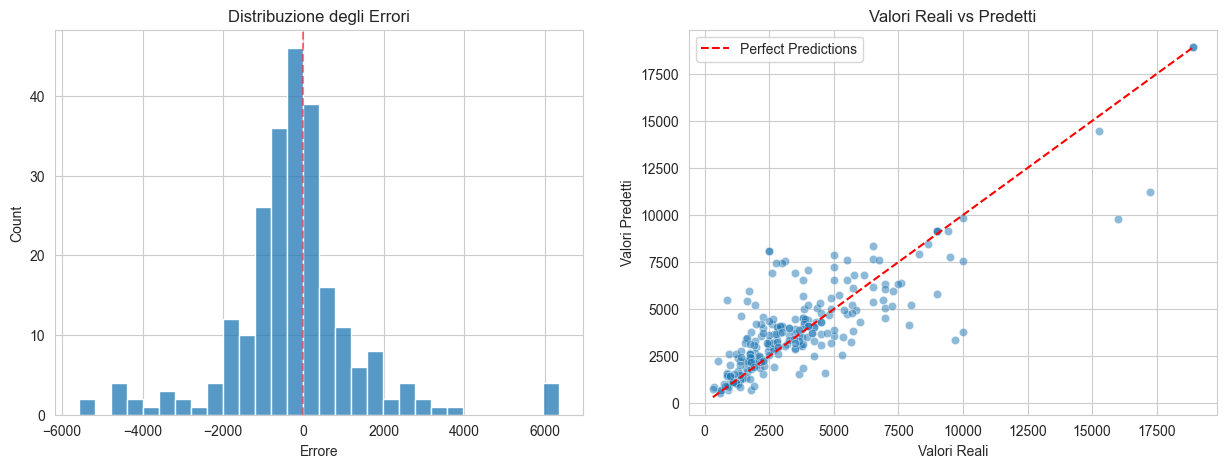

In [23]:
error_df, worst_cases = analyze_prediction_errors(y_test, y_pred, X_test)

In [24]:
ref_worst =df_.iloc[worst_cases.index.to_list()]
ref_worst

,name,year,Price,kms_driven,fuel_type,vehicle_type
677,Maruti Suzuki SX4 Celebration Diesel,2016,9700.0,85960,Diesel,Compact
14,Audi A8,2017,10000.0,4000,Petrol,Luxury
511,Audi A6 2.0 TDI Premium,2012,15990.0,11500,Diesel,Sedan
653,Mitsubishi Pajero Sport 2.5 AT,2015,17250.0,37000,Diesel,SUV
50,Mahindra Scorpio S10 4WD,2015,2500.0,48508,Diesel,SUV
29,Mahindra Scorpio S10 4WD,2015,2500.0,48508,Diesel,SUV
157,Toyota Etios GD,2013,2750.0,24800,Petrol,Sedan
501,Mitsubishi Lancer 1.8 LXi,2006,850.0,50000,Petrol,Sedan
783,Chevrolet Sail 1.2 LS,2013,3000.0,28000,Petrol,Sedan
19,Mahindra Scorpio S10,2016,3100.0,39522,Diesel,SUV


In [25]:
ref_worst.merge(worst_cases[['Actual', 'Predicted', 'Error', 'Abs_Error']], on=ref_worst.index)

,key_0,name,year,Price,kms_driven,fuel_type,vehicle_type,Actual,Predicted,Error,Abs_Error
0,677,Maruti Suzuki SX4 Celebration Diesel,2016,9700.0,85960,Diesel,Compact,9700.0,3341.3997,6358.6003,6358.6003
1,14,Audi A8,2017,10000.0,4000,Petrol,Luxury,10000.0,3760.8979,6239.1021,6239.1021
2,511,Audi A6 2.0 TDI Premium,2012,15990.0,11500,Diesel,Sedan,15990.0,9803.1989,6186.8011,6186.8011
3,653,Mitsubishi Pajero Sport 2.5 AT,2015,17250.0,37000,Diesel,SUV,17250.0,11227.3995,6022.6005,6022.6005
4,50,Mahindra Scorpio S10 4WD,2015,2500.0,48508,Diesel,SUV,2500.0,8086.5526,-5586.5526,5586.5526
5,29,Mahindra Scorpio S10 4WD,2015,2500.0,48508,Diesel,SUV,2500.0,8086.5526,-5586.5526,5586.5526
6,157,Toyota Etios GD,2013,2750.0,24800,Petrol,Sedan,2750.0,7460.3972,-4710.3972,4710.3972
7,501,Mitsubishi Lancer 1.8 LXi,2006,850.0,50000,Petrol,Sedan,850.0,5501.4984,-4651.4984,4651.4984
8,783,Chevrolet Sail 1.2 LS,2013,3000.0,28000,Petrol,Sedan,3000.0,7462.1978,-4462.1978,4462.1978
9,19,Mahindra Scorpio S10,2016,3100.0,39522,Diesel,SUV,3100.0,7542.8997,-4442.8997,4442.8997
